**Implementation For Single Layer Perceptron**

Import necessary libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline


Loading Dataset

In [ ]:
(x_train, y_train),\
	(x_test, y_test) = keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 5s 0us/step


Displaying The Shape and Image Of Single Image present in dataset

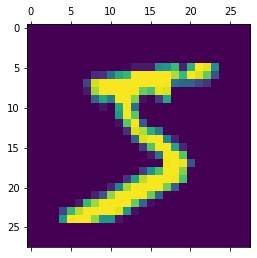

In [ ]:
len(x_train)
len(x_test)
x_train[0].shape
plt.matshow(x_train[0]);


Normalizing the Dataset

In [ ]:
# Normalizing the dataset
x_train = x_train/255
x_test = x_test/255

# Flatting the dataset in order
# to compute for model building
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)


Building The Neural Network:

In [ ]:
model = keras.Sequential([
	keras.layers.Dense(10, input_shape=(784,),
					activation='sigmoid')
])
model.compile(
	optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4666 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3041 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2836 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2668 - accuracy: 0.9256


Accuracy Of Model On Testing Data:

In [ ]:
model.evaluate(x_test_flatten, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.2675 - accuracy: 0.9257


[0.26750877499580383, 0.9257000088691711]

**Implementation Of Back Propogation Algorithm:**

In [ ]:
# Required Lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# sigmoid Function
def nlinear(x,deriv=False):
  if(deriv==True):
    return x*(1-x)
  return 1/(1+np.exp(-x))

In [ ]:
#Input dataset
X=np.array([[0,0,1],
           [0,1,1],
           [1,0,1],
           [1,1,1]])

#Output Dataset
# T is transpose function
y=np.array([[0,0,1,1]]).T


np.random.seed(1)

#initalizing weights with random mean 0
synapse0=2*np.random.random((3,1))-1


In [ ]:
for i in range(1000):

  #forward Propogation
  layer0=X
  layer1=nlinear(np.dot(layer0,synapse0))

  layer1_error=y-layer1

  #multiply how much error backpropogated
  layer1_delta=layer1_error*nlinear(layer1,True)


  #update weight as per backpropogation
  synapse0+=np.dot(layer0.T,layer1_delta)

In [ ]:
print("Output After Training:")
print(layer1)
print("Actucal Output")
print(y)


Output After Training:
[[0.02210697]
 [0.01793972]
 [0.98540523]
 [0.98200075]]
Actucal Output
[[0]
 [0]
 [1]
 [1]]


In [ ]:
df=[y,layer1]

In [ ]:
df

[array([[0],
        [0],
        [1],
        [1]]),
 array([[0.02210697],
        [0.01793972],
        [0.98540523],
        [0.98200075]])]

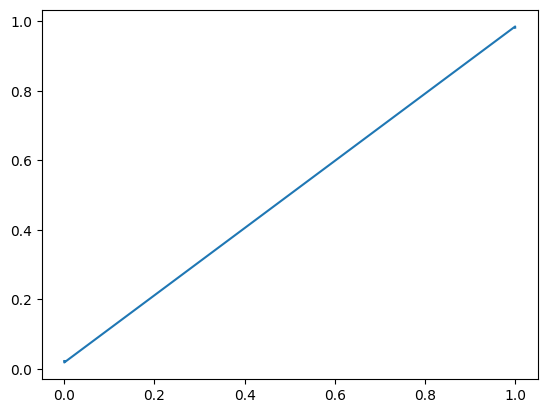

In [ ]:
plt.plot(y,layer1)